In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import os
import glob

2024-06-21 10:59:42.487520: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 10:59:43.613809: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from os import listdir
from os.path import isfile, join

dataset = pd.concat(map(pd.read_csv, glob.glob('/home/ubuntu/Documents/Paper 1/MSG2ds548.1/cleaned_csv/2010-2019/G3/*.csv')))
dataset.head()

,Year/Month,Box Size,Longitude,Latitude,PID2: Standard/Enhanced,Group,Checksum,S-S1,S-Median,S-S5,...,R-S1,R-Median,R-S5,R-Mean,R-Observation number,R-Standard deviation,R-Mean day of the month,R-Fraction of daylight observations,R-Mean Longitude,R-Mean Latitude
0,2010/5,2,6.0,78.0,0,3,7,1.93,2.2,2.47,...,81.6,81.7,81.8,81.7,2,0.3,14,1.0,0.5,0.8
1,2010/5,2,8.0,78.0,0,3,2,-0.57,-0.5,-0.09,...,76.7,78.8,80.9,78.8,2,4.4,8,1.0,0.4,0.3
2,2010/5,2,10.0,78.0,0,3,10,-0.48,-0.2,0.23,...,85.4,88.4,92.3,88.5,11,3.8,20,1.0,0.5,0.6
3,2010/5,2,12.0,78.0,0,3,14,-1.35,-1.1,-0.48,...,79.7,83.2,91.7,85.6,3,9.1,16,1.0,0.3,0.0
4,2010/5,2,14.0,78.0,0,3,5,-0.95,-0.6,-0.20,...,77.9,83.9,92.3,84.6,7,7.1,14,1.0,0.6,0.1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270663 entries, 0 to 4553
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Year/Month                           270663 non-null  object 
 1   Box Size                             270663 non-null  int64  
 2   Longitude                            270663 non-null  float64
 3   Latitude                             270663 non-null  float64
 4   PID2: Standard/Enhanced              270663 non-null  int64  
 5   Group                                270663 non-null  int64  
 6   Checksum                             270663 non-null  int64  
 7   S-S1                                 270663 non-null  float64
 8   S-Median                             270663 non-null  float64
 9   S-S5                                 270663 non-null  float64
 10  S-Mean                               270663 non-null  float64
 11  S-Observation number

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
import matplotlib.pyplot as plt
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow warnings

# Load the data
df = dataset

# Display the first few rows of the dataframe
print(df.head())

# Display information about the dataframe
print(df.info())

# Display statistical summary
print(df.describe())

# Check for any remaining NaN values
print(df.isna().sum())

# Remove rows with NaN values (if any)
df.dropna(inplace=True)

# Extract temporal features from 'Year/Month'
df['Year/Month'] = pd.to_datetime(df['Year/Month'], format='%Y/%m')
df['Year'] = df['Year/Month'].dt.year
df['Month'] = df['Year/Month'].dt.month

# Drop the original 'Year/Month' column
df.drop(columns=['Year/Month'], inplace=True)

# Check for any NaN values after pivoting
print(df.isna().sum())

# Handle missing values
df.fillna(method='ffill', inplace=True)

  Year/Month  Box Size  Longitude  Latitude  PID2: Standard/Enhanced  Group  \
0     2010/5         2        6.0      78.0                        0      3   
1     2010/5         2        8.0      78.0                        0      3   
2     2010/5         2       10.0      78.0                        0      3   
3     2010/5         2       12.0      78.0                        0      3   
4     2010/5         2       14.0      78.0                        0      3   

   Checksum  S-S1  S-Median  S-S5  ...  R-S1  R-Median  R-S5  R-Mean  \
0         7  1.93       2.2  2.47  ...  81.6      81.7  81.8    81.7   
1         2 -0.57      -0.5 -0.09  ...  76.7      78.8  80.9    78.8   
2        10 -0.48      -0.2  0.23  ...  85.4      88.4  92.3    88.5   
3        14 -1.35      -1.1 -0.48  ...  79.7      83.2  91.7    85.6   
4         5 -0.95      -0.6 -0.20  ...  77.9      83.9  92.3    84.6   

   R-Observation number  R-Standard deviation  R-Mean day of the month  \
0                 

In [5]:
# Split features and target
X = df[['Year', 'Month', 'Longitude', 'Latitude', 'S-Mean', 'A-Mean', 'Q-Mean', 'R-Mean']].values  # Features
y = df[['S-Mean']].values  # Targets

# Check for NaN or infinite values in targets
print("NaN values in y:", np.isnan(y).sum())
print("Infinite values in y:", np.isinf(y).sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check for NaN values in scaled features
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(y_train.shape[1]))  # Output layer with 4 neurons for Mean_S, Mean_A, Mean_Q, Mean_R

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NaN values in y: 0
Infinite values in y: 0
NaN values in X_train: 0
NaN values in X_test: 0
Epoch 1/500


/home/ubuntu/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1693/5414 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 436.8714 - mae: 20.3031

KeyboardInterrupt: 

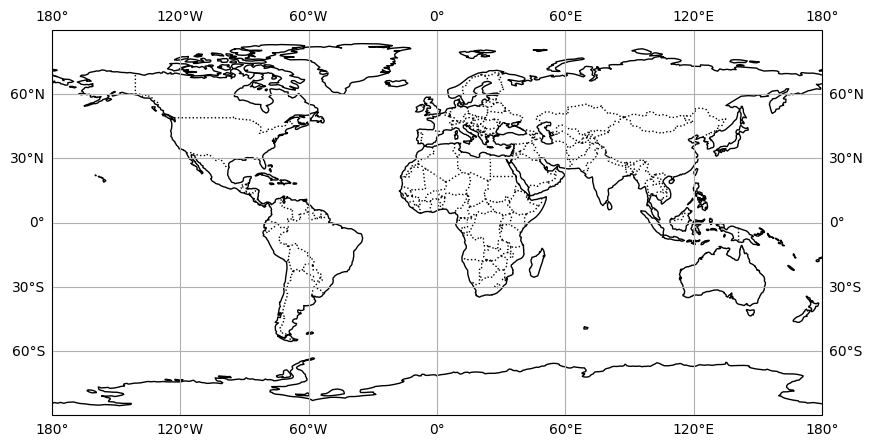

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Separate the data into longitude and latitude lists
# lons, lats = zip(*data)

# Create a figure and an axis with a specific projection
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and other features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the data points
# ax.scatter(lons, lats, color='red', marker='o', transform=ccrs.PlateCarree())

# Set extent if you want to zoom in a specific region
# ax.set_extent([-130, 60, 20, 50], crs=ccrs.PlateCarree())

# Add gridlines and labels
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()

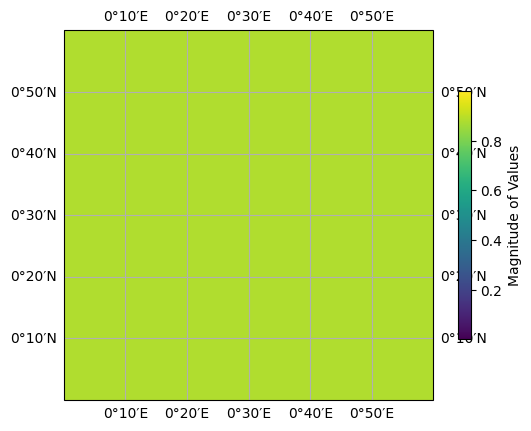

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Example data: 2° x 2° grid with corresponding values
# lat_range and lon_range should be the ranges of your grid
lat_range = np.arange(-90, 90, 2)
lon_range = np.arange(-180, 180, 2)
data_values = np.random.rand(len(lat_range), len(lon_range))  # Example: random values

# Create a figure and an axis with a specific projection
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and other features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot each grid cell as a colored rectangle
for i, lat in enumerate(lat_range):
    for j, lon in enumerate(lon_range):
        value = data_values[i, j]
        color = plt.cm.viridis(value)  # Use a colormap (viridis in this case)
        ax.add_patch(plt.Rectangle((lon, lat), 2, 2, facecolor=color, edgecolor='none', transform=ccrs.PlateCarree()))

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=np.min(data_values), vmax=np.max(data_values)))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.025, pad=0.05)
cbar.set_label('Magnitude of Values')

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Show the plot
plt.show()
